In [3]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
writer = SummaryWriter("runs/experiment_1")
for i in range(100):
    writer.add_scalar("Loss/train", 0.5, i)
    writer.add_scalar("Loss/test", 0.5, i)
    writer.add_scalar("Accuracy/train", 0.8, i)
    writer.add_scalar("Accuracy/test", 0.8, i)
    writer.add_scalar("Learning Rate", 0.001, i)

writer.close()

In [5]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [ ]:
from torchvision import datasets, transforms


training_data = datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]),
)

test_data = datasets.FashionMNIST(
    root="./data",
    train=False,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]),
)

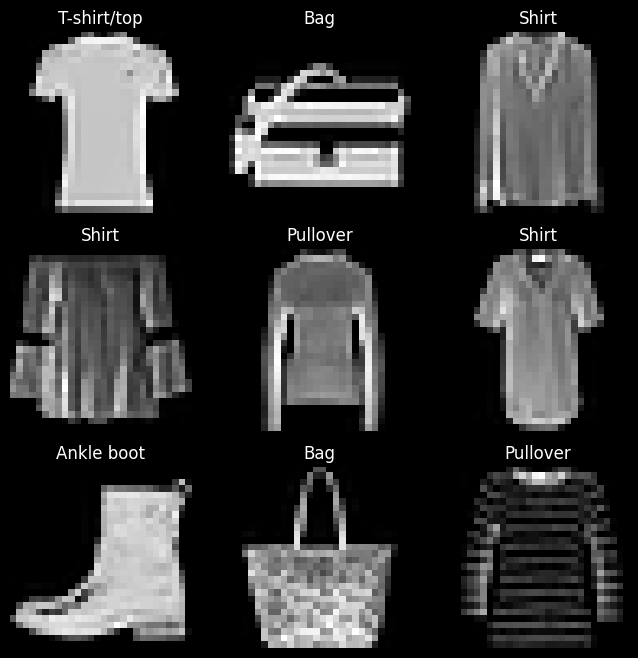

In [ ]:
from matplotlib import figure


labels_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Dataset 会一次获取数据集中的特征和标签。在训练模型时，我们通常希望以“小批量”的形式传递样本，并在每个 epoch 重新打乱数据以减少模型过拟合，并使用 Python 的 multiprocessing 来加快数据检索速度。

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


我们已将数据集加载到 DataLoader 中，并且可以根据需要迭代数据集。每次迭代都会返回一批 train_features 和 train_labels （分别包含 batch_size=64 个特征和标签）。由于我们指定了 shuffle=True ，因此在迭代完所有批次后，数据会被打乱（为了更精细地控制数据加载顺序，请查看 Samplers）。

Feature batch shape:torch.Size([64, 1, 28, 28])
Labels batch shape:torch.Size([64])


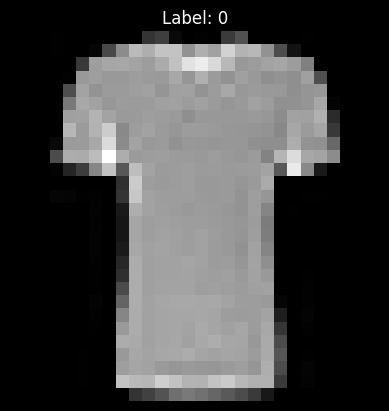

In [ ]:
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape:{train_features.size()}")
print(f"Labels batch shape:{train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()


In [4]:
from transformers import pipeline

segmenter = pipeline(task="image-segmentation")
preds = segmenter(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")


RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
module 'torch' has no attribute 'version'